In [16]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [17]:
df = pd.read_csv('MLTempDataset.csv')

In [18]:
df = df.drop(columns=['Unnamed: 0'])



In [19]:
print(df.describe().to_latex())

\begin{tabular}{lrr}
\toprule
{} &    Datetime1 &    DAYTON\_MW \\
\midrule
count &  6676.000000 &  6676.000000 \\
mean  &    11.502846 &    21.736007 \\
std   &     6.909701 &     6.850502 \\
min   &     0.000000 &     5.350000 \\
25\%   &     6.000000 &    17.512750 \\
50\%   &    11.000000 &    23.900000 \\
75\%   &    17.000000 &    26.367000 \\
max   &    23.000000 &    36.500000 \\
\bottomrule
\end{tabular}



C:\Users\victo\AppData\Local\Temp\ipykernel_5624\707640075.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.describe().to_latex())


In [20]:
print(df.head(5).to_latex(index=False))

\begin{tabular}{rrl}
\toprule
 Datetime1 &  DAYTON\_MW &            Datetime \\
\midrule
         0 &     20.867 & 2022-01-04 00:00:00 \\
         1 &     21.000 & 2022-01-04 01:00:00 \\
         2 &     20.867 & 2022-01-04 02:00:00 \\
         3 &     20.650 & 2022-01-04 03:00:00 \\
         4 &     20.400 & 2022-01-04 04:00:00 \\
\bottomrule
\end{tabular}



C:\Users\victo\AppData\Local\Temp\ipykernel_5624\3682244964.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.head(5).to_latex(index=False))


In [21]:
df.index = pd.to_datetime(df['Datetime'], format='%Y-%m-%d %H:%M:%S')

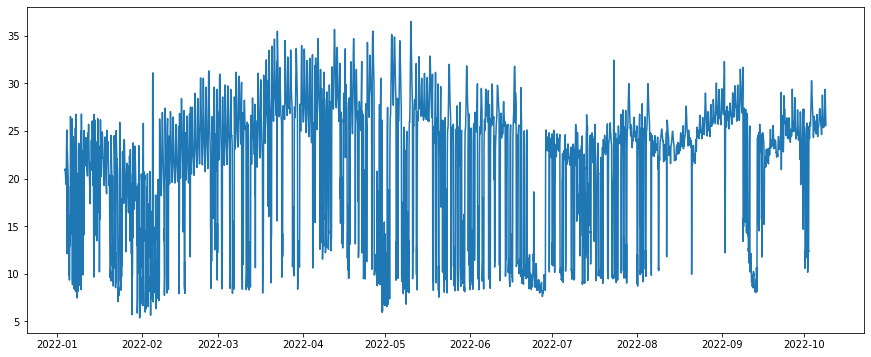

In [22]:
temperature = df['DAYTON_MW']
plt.figure(figsize=(15,6))
plt.plot(temperature)
plt.savefig('dataset2_spikes')

In [23]:
def df_to_X_y(df, window_size=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [[a] for a in df_as_np[i:i+5]]
        X.append(row)
        label = df_as_np[i+5]
        y.append(label)
    return np.array(X), np.array(y)
         

In [24]:
WINDOW_SIZE=5
X,y = df_to_X_y(temperature, WINDOW_SIZE)
X


array([[[20.867],
        [21.   ],
        [20.867],
        [20.65 ],
        [20.4  ]],

       [[21.   ],
        [20.867],
        [20.65 ],
        [20.4  ],
        [20.1  ]],

       [[20.867],
        [20.65 ],
        [20.4  ],
        [20.1  ],
        [19.8  ]],

       ...,

       [[29.367],
        [28.767],
        [28.   ],
        [27.35 ],
        [26.8  ]],

       [[28.767],
        [28.   ],
        [27.35 ],
        [26.8  ],
        [26.45 ]],

       [[28.   ],
        [27.35 ],
        [26.8  ],
        [26.45 ],
        [25.9  ]]])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=500, shuffle=False)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


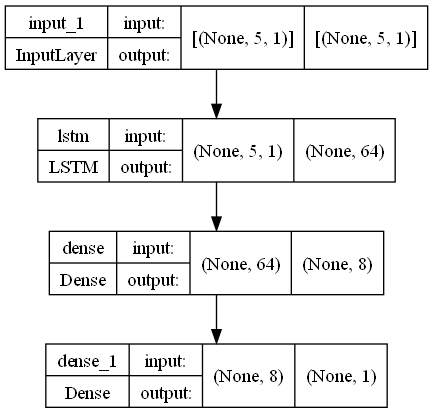

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()
from keras.utils.vis_utils import plot_model
plot_model(model1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [12]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, callbacks=[cp1])

Epoch 1/150
191/193 [============================>.] - ETA: 0s - loss: 489.9854 - root_mean_squared_error: 22.1356

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


193/193 [==============================] - 130s 272ms/step - loss: 489.6793 - root_mean_squared_error: 22.1287 - val_loss: 539.4981 - val_root_mean_squared_error: 23.2271
Epoch 2/150
191/193 [============================>.] - ETA: 0s - loss: 384.1591 - root_mean_squared_error: 19.6000

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


193/193 [==============================] - 40s 210ms/step - loss: 383.8868 - root_mean_squared_error: 19.5930 - val_loss: 379.9011 - val_root_mean_squared_error: 19.4911
Epoch 3/150
193/193 [==============================] - ETA: 0s - loss: 253.7293 - root_mean_squared_error: 15.9289

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


193/193 [==============================] - 53s 278ms/step - loss: 253.7293 - root_mean_squared_error: 15.9289 - val_loss: 253.6947 - val_root_mean_squared_error: 15.9278
Epoch 4/150
190/193 [============================>.] - ETA: 0s - loss: 173.8867 - root_mean_squared_error: 13.1866

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


193/193 [==============================] - 30s 155ms/step - loss: 173.4033 - root_mean_squared_error: 13.1683 - val_loss: 174.0788 - val_root_mean_squared_error: 13.1939
Epoch 5/150
192/193 [============================>.] - ETA: 0s - loss: 121.7301 - root_mean_squared_error: 11.0331

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


193/193 [==============================] - 44s 228ms/step - loss: 121.6357 - root_mean_squared_error: 11.0289 - val_loss: 117.5925 - val_root_mean_squared_error: 10.8440
Epoch 6/150
191/193 [============================>.] - ETA: 0s - loss: 89.2157 - root_mean_squared_error: 9.4454

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


193/193 [==============================] - 45s 182ms/step - loss: 89.1729 - root_mean_squared_error: 9.4431 - val_loss: 81.0848 - val_root_mean_squared_error: 9.0047
Epoch 7/150
193/193 [==============================] - ETA: 0s - loss: 69.1502 - root_mean_squared_error: 8.3157

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


193/193 [==============================] - 31s 162ms/step - loss: 69.1502 - root_mean_squared_error: 8.3157 - val_loss: 54.8596 - val_root_mean_squared_error: 7.4067
Epoch 8/150
191/193 [============================>.] - ETA: 0s - loss: 53.4764 - root_mean_squared_error: 7.3128

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


193/193 [==============================] - 31s 162ms/step - loss: 53.4316 - root_mean_squared_error: 7.3097 - val_loss: 37.3423 - val_root_mean_squared_error: 6.1108
Epoch 9/150
187/193 [============================>.] - ETA: 0s - loss: 39.9922 - root_mean_squared_error: 6.3239

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


193/193 [==============================] - 47s 246ms/step - loss: 39.8389 - root_mean_squared_error: 6.3118 - val_loss: 24.4733 - val_root_mean_squared_error: 4.9470
Epoch 10/150
186/193 [===========================>..] - ETA: 0s - loss: 29.0157 - root_mean_squared_error: 5.3866

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


193/193 [==============================] - 42s 218ms/step - loss: 29.0049 - root_mean_squared_error: 5.3856 - val_loss: 14.2102 - val_root_mean_squared_error: 3.7696
Epoch 11/150
186/193 [===========================>..] - ETA: 0s - loss: 21.7678 - root_mean_squared_error: 4.6656

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


193/193 [==============================] - 31s 163ms/step - loss: 21.6353 - root_mean_squared_error: 4.6514 - val_loss: 8.5849 - val_root_mean_squared_error: 2.9300
Epoch 12/150
189/193 [============================>.] - ETA: 0s - loss: 17.5555 - root_mean_squared_error: 4.1899

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


193/193 [==============================] - 44s 227ms/step - loss: 17.4632 - root_mean_squared_error: 4.1789 - val_loss: 5.7854 - val_root_mean_squared_error: 2.4053
Epoch 13/150
192/193 [============================>.] - ETA: 0s - loss: 14.8102 - root_mean_squared_error: 3.8484

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


193/193 [==============================] - 42s 218ms/step - loss: 14.8077 - root_mean_squared_error: 3.8481 - val_loss: 4.0823 - val_root_mean_squared_error: 2.0205
Epoch 14/150
193/193 [==============================] - ETA: 0s - loss: 12.9543 - root_mean_squared_error: 3.5992

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


193/193 [==============================] - 43s 223ms/step - loss: 12.9543 - root_mean_squared_error: 3.5992 - val_loss: 2.9816 - val_root_mean_squared_error: 1.7267
Epoch 15/150
184/193 [===========================>..] - ETA: 0s - loss: 11.6947 - root_mean_squared_error: 3.4198

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


193/193 [==============================] - 38s 196ms/step - loss: 11.6806 - root_mean_squared_error: 3.4177 - val_loss: 2.6061 - val_root_mean_squared_error: 1.6144
Epoch 16/150
188/193 [============================>.] - ETA: 0s - loss: 10.8206 - root_mean_squared_error: 3.2895

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


193/193 [==============================] - 42s 221ms/step - loss: 10.7754 - root_mean_squared_error: 3.2826 - val_loss: 2.0051 - val_root_mean_squared_error: 1.4160
Epoch 17/150
193/193 [==============================] - 13s 69ms/step - loss: 10.1108 - root_mean_squared_error: 3.1798 - val_loss: 2.3050 - val_root_mean_squared_error: 1.5182
Epoch 18/150
186/193 [===========================>..] - ETA: 0s - loss: 9.5469 - root_mean_squared_error: 3.0898

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


193/193 [==============================] - 42s 219ms/step - loss: 9.6291 - root_mean_squared_error: 3.1031 - val_loss: 1.7757 - val_root_mean_squared_error: 1.3326
Epoch 19/150
193/193 [==============================] - 12s 63ms/step - loss: 9.2449 - root_mean_squared_error: 3.0405 - val_loss: 1.8469 - val_root_mean_squared_error: 1.3590
Epoch 20/150
192/193 [============================>.] - ETA: 0s - loss: 8.9518 - root_mean_squared_error: 2.9920

In [27]:
model1 = tf.keras.models.load_model('saved_model/lstm_model_bad')

In [28]:
x_val = X[500:1000]
y_val = y[500:1000]
train_predictions = model1.predict(x_val).flatten()
train_results = pd.DataFrame(data={'Train Predictions': train_predictions, 'Actuals': y_val})
train_results

,Train Predictions,Actuals
0,23.703650,22.833
1,22.321037,22.300
2,22.269825,21.600
3,21.317129,21.000
4,20.823828,20.600
...,...,...
495,10.107238,11.100
496,12.495662,11.567
497,13.844969,14.200
498,14.875808,14.667


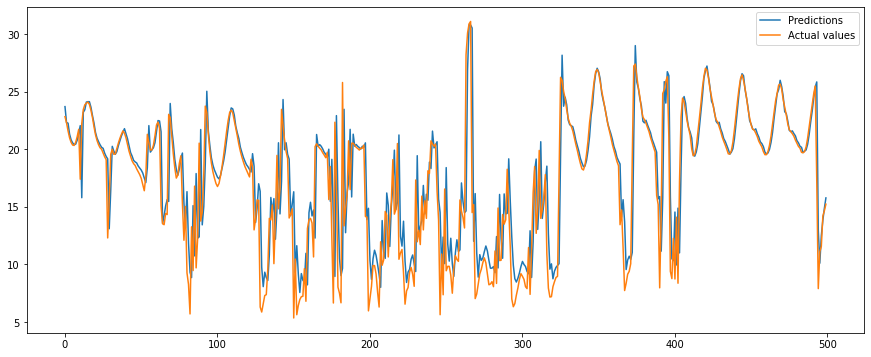

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.plot(train_results['Train Predictions'], label = "Predictions")
plt.plot(train_results['Actuals'], label = "Actual values")
plt.legend(loc='best')
plt.savefig('model1_prediction_results')


In [30]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score, mean_absolute_percentage_error
ypred =model.predict(X)
print("\n \n Model Evaluation Report: ")
print('Mean Absolute Error(MAE) of', 'Model1',':', mean_absolute_error(train_results['Actuals'], train_results['Train Predictions']))
print('Mean Squared Error(MSE) of', 'Model1',':', mean_squared_error(train_results['Actuals'], train_results['Train Predictions']))
print('Root Mean Squared Error (RMSE) of', 'Model1',':', mean_squared_error(train_results['Actuals'], train_results['Train Predictions'], squared = False))
print('Mean absolute percentage error (MAPE) of', 'Model1',':', mean_absolute_percentage_error(train_results['Actuals'], train_results['Train Predictions']))
print('Explained Variance Score (EVS) of', 'Model1',':', explained_variance_score(train_results['Actuals'], train_results['Train Predictions']))
print('R2 of', 'Model1',':', (r2_score(train_results['Actuals'], train_results['Train Predictions'])).round(2))
print('\n \n')


 
 Model Evaluation Report: 
Mean Absolute Error(MAE) of Model1 : 1.8451731958618163
Mean Squared Error(MSE) of Model1 : 9.940813021850442
Root Mean Squared Error (RMSE) of Model1 : 3.152905488886472
Mean absolute percentage error (MAPE) of Model1 : 0.15409361659205273
Explained Variance Score (EVS) of Model1 : 0.7137427421347284
R2 of Model1 : 0.71

 



In [ ]:
model1.save('saved_model/lstm_model_bad')

ts:0x00124b002917f1bf:temperature


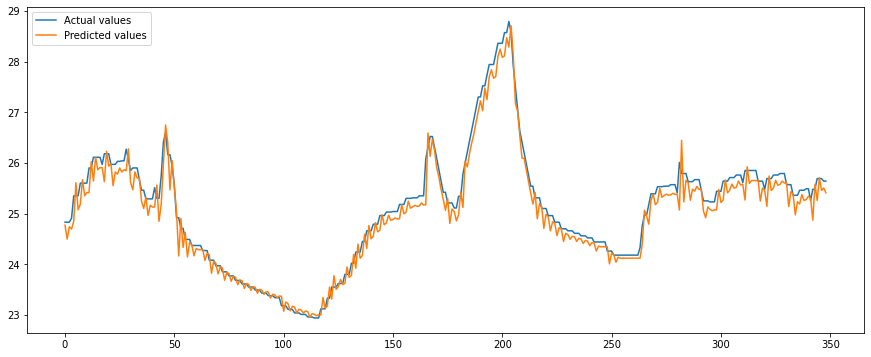

In [40]:



import tensorflow as tf
import redis
import datetime
import pandas as pd
import numpy as np
from tensorflow.keras.backend import square, mean
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

class RedisGetter:
    def __init__(self, device_name, property_name):
        self.device_name = device_name
        self.property_name = property_name
        self.connect_to_db()

        self.key = f"ts:{self.device_name[1:]}:{self.property_name}"

    def connect_to_db(self):
        self.r = redis.Redis(
            host="192.168.100.152",
            port=6379,
        )

    def get_parameter_info_ts_range(self):
        # message = self.r.info()
        ts = self.r.ts()
        print(self.key)
        info = ts.info(self.key)
        return (info.first_timestamp, info.last_timestamp)

    def get_data_in_range(self):
        range = self.get_parameter_info_ts_range()

        data = self.r.ts()
        range_data = data.range(self.key, range[0], range[1])
        return range_data

    def parse_range_data(self, resample_value="5T"):
        range_data = self.get_data_in_range()
        ts, param = zip(*range_data)
        ts = list(ts)
        param = list(param)

        ts_string = [
            datetime.datetime.fromtimestamp(int(ts / 1000)).strftime(
                "%Y-%m-%d %H:%M:%S"
            )
            for ts in ts
        ]
        ts_date = [
            datetime.datetime.strptime(ts, "%Y-%m-%d %H:%M:%S") for ts in ts_string
        ]
        device_data = pd.DataFrame(
            {"Date": ts_date, self.property_name: param})
        device_data["Date"] = pd.to_datetime(device_data["Date"])
        device_data = (
            device_data.set_index("Date")
            .resample(rule=resample_value[:-1])
            .bfill()
        )
        return device_data


class ModelPredictor():
    def __init__(self, device, key):
        self.data = RedisGetter(device,
                                key).parse_range_data("10T\"")

    def load_model(self, path):
        return tf.keras.models.load_model(path)

    def prepare_input_data(self, input_data):
        self.x_scaler = MinMaxScaler()
        data = self.x_scaler.fit_transform(input_data)
        return data

    def prepare_output_data(self, output_data):
        self.y_scaler = MinMaxScaler()
        self.y_scaler.fit_transform(output_data)

    def make_prediction(self):
        data = self.data
        X,y = df_to_X_y(data['temperature'], WINDOW_SIZE)
        model = self.load_model('saved_model/lstm_model_bad')

        prediction = model.predict(X)
        plt.figure(figsize=(15,6))
        # plt.plot(data)
        # plt.xticks(rotation=45)

        plt.plot(y,label='Actual values')
        plt.plot( prediction,label='Predicted values')
        plt.legend(loc="upper left")
        plt.savefig('predicted+actual')
        plt.show()

        return prediction


x = ModelPredictor("\"0x00124b002917f1bf", "temperature").make_prediction()


In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

df['Temp_OneHourBack'] = df['DAYTON_MW'].shift(+1)
df['Temp_TwoHourBack'] = df['DAYTON_MW'].shift(+2)
df['Temp_ThreeHourBack'] = df['DAYTON_MW'].shift(+3)
df['Temp_FourHourBack'] = df['DAYTON_MW'].shift(+4)
df['Temp_FiveHourBack'] = df['DAYTON_MW'].shift(+5)

df

,Datetime1,DAYTON_MW,Datetime,Temp_OneHourBack,Temp_TwoHourBack,Temp_ThreeHourBack,Temp_FourHourBack,Temp_FiveHourBack
Datetime,,,,,,,,
2022-01-04 00:00:00,0,20.867,2022-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN
2022-01-04 01:00:00,1,21.000,2022-01-04 01:00:00,20.867,NaN,NaN,NaN,NaN
2022-01-04 02:00:00,2,20.867,2022-01-04 02:00:00,21.000,20.867,NaN,NaN,NaN
2022-01-04 03:00:00,3,20.650,2022-01-04 03:00:00,20.867,21.000,20.867,NaN,NaN
2022-01-04 04:00:00,4,20.400,2022-01-04 04:00:00,20.650,20.867,21.000,20.867,NaN
...,...,...,...,...,...,...,...,...
2022-10-08 23:00:00,19,27.350,2022-10-08 23:00:00,28.000,28.767,29.367,28.983,28.533
2022-10-09 00:00:00,20,26.800,2022-10-09 00:00:00,27.350,28.000,28.767,29.367,28.983
2022-10-09 01:00:00,21,26.450,2022-10-09 01:00:00,26.800,27.350,28.000,28.767,29.367


In [43]:
df=df.dropna()
df
     

,Datetime1,DAYTON_MW,Datetime,Temp_OneHourBack,Temp_TwoHourBack,Temp_ThreeHourBack,Temp_FourHourBack,Temp_FiveHourBack
Datetime,,,,,,,,
2022-01-04 05:00:00,5,20.100,2022-01-04 05:00:00,20.40,20.650,20.867,21.000,20.867
2022-01-04 06:00:00,6,19.800,2022-01-04 06:00:00,20.10,20.400,20.650,20.867,21.000
2022-01-04 07:00:00,7,19.500,2022-01-04 07:00:00,19.80,20.100,20.400,20.650,20.867
2022-01-04 08:00:00,8,19.400,2022-01-04 08:00:00,19.50,19.800,20.100,20.400,20.650
2022-01-04 09:00:00,9,19.500,2022-01-04 09:00:00,19.40,19.500,19.800,20.100,20.400
...,...,...,...,...,...,...,...,...
2022-10-08 23:00:00,19,27.350,2022-10-08 23:00:00,28.00,28.767,29.367,28.983,28.533
2022-10-09 00:00:00,20,26.800,2022-10-09 00:00:00,27.35,28.000,28.767,29.367,28.983
2022-10-09 01:00:00,21,26.450,2022-10-09 01:00:00,26.80,27.350,28.000,28.767,29.367


In [44]:
from sklearn.ensemble import RandomForestRegressor
model_reg=RandomForestRegressor(n_estimators=1000,max_features=5, random_state=42)

In [45]:
import numpy as np
x1,x2,x3,x4,x5, y = df['Temp_OneHourBack'], df['Temp_TwoHourBack'],df['Temp_ThreeHourBack'],df['Temp_FourHourBack'], df['Temp_FiveHourBack'], df['DAYTON_MW']
x1,x2,x3,x4,x5,y=np.array(x1),np.array(x2),np.array(x3),np.array(x4),np.array(x5), np.array(y)
x1,x2,x3,x4,x5,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),x4.reshape(-1,1),x5.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3,x4,x5),axis=1)
print(final_x)
     

[[20.4   20.65  20.867 21.    20.867]
 [20.1   20.4   20.65  20.867 21.   ]
 [19.8   20.1   20.4   20.65  20.867]
 ...
 [26.8   27.35  28.    28.767 29.367]
 [26.45  26.8   27.35  28.    28.767]
 [25.9   26.45  26.8   27.35  28.   ]]


In [46]:

X_train,X_test,y_train,y_test=final_x[:-30],final_x[-30:],y[:-30],y[-30:]

In [47]:
model_reg.fit(X_train,y_train)

C:\Users\victo\AppData\Local\Temp\ipykernel_5624\359500455.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_reg.fit(X_train,y_train)


RandomForestRegressor(max_features=5, n_estimators=1000, random_state=42)

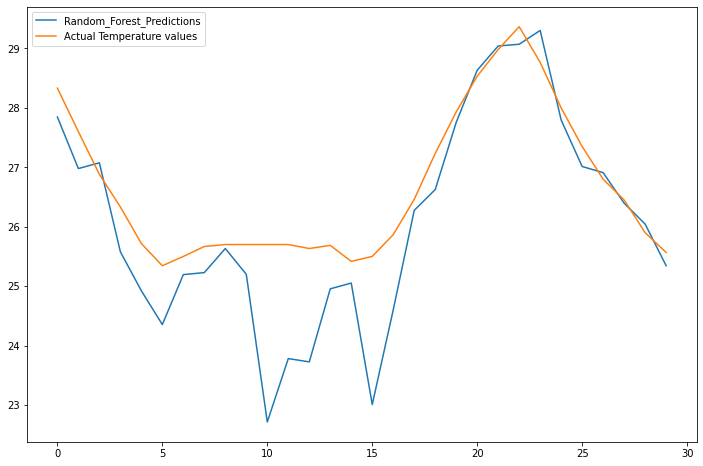

In [50]:
pred = model_reg.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Temperature values')
plt.legend(loc="upper left")
plt.savefig('rfpred')
plt.show()
     

In [49]:
print("\n \n Model Evaluation Report: ")
print('Mean Absolute Error(MAE) of', 'model_reg',':', mean_absolute_error(y_test, pred))
print('Mean Squared Error(MSE) of', 'model_reg',':', mean_squared_error(y_test, pred))
print('Root Mean Squared Error (RMSE) of', 'model_reg',':', mean_squared_error(y_test, pred, squared = False))
print('Mean absolute percentage error (MAPE) of', 'model_reg',':', mean_absolute_percentage_error(y_test, pred))
print('Explained Variance Score (EVS) of', 'model_reg',':', explained_variance_score(y_test, pred))
print('R2 of', 'Model1',':', (r2_score(y_test, pred)).round(2))
print('\n \n')


 
 Model Evaluation Report: 
Mean Absolute Error(MAE) of model_reg : 0.6619228333333245
Mean Squared Error(MSE) of model_reg : 0.9727482397574828
Root Mean Squared Error (RMSE) of model_reg : 0.9862800006881833
Mean absolute percentage error (MAPE) of model_reg : 0.025386033326984966
Explained Variance Score (EVS) of model_reg : 0.5779380981352994
R2 of Model1 : 0.35

 



16/16 [==============================] - 5s 6ms/step - loss: 1.7517 - root_mean_squared_error: 1.3235


[1.7516512870788574, 1.3234995603561401]